In [ ]:
#entropy--> randomness
#less entropy -- ? high information gain
#gini impurity : less

In [1]:
import pandas as pd
df=pd.read_csv('./data/salaries.csv')

In [2]:
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [3]:
inputs=df.drop('salary_more_then_100k',axis='columns')

In [4]:
target=df['salary_more_then_100k']

In [5]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()



In [7]:
inputs['company_n']=le_company.fit_transform(inputs['company'])
inputs['job_n']=le_job.fit_transform(inputs['job'])
inputs['degree_n']=le_degree.fit_transform(inputs['degree'])


In [8]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [9]:
inputs=inputs.drop(['company','job','degree'],axis='columns')

In [10]:
inputs

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [11]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(inputs,target)


DecisionTreeClassifier()

In [14]:
model.predict([[2,2,0]])

/home/mahima/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [13]:
model.score(inputs,target)

1.0

In [28]:
#exercise
df=pd.read_csv('./data/titanic.csv')

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
#survival of passanger
df2=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')

In [32]:
df2.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [33]:
from sklearn.preprocessing import LabelEncoder
se=LabelEncoder()
df2['Sex']=se.fit_transform(df['Sex'])
df2

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500
...,...,...,...,...,...
886,0,2,1,27.0,13.0000
887,1,1,0,19.0,30.0000
888,0,3,0,NaN,23.4500
889,1,1,1,26.0,30.0000


In [37]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
inputs=df2.drop('Survived',axis='columns')
target=df2['Survived']
model.fit(inputs,target)
model.predict([[3,1,22,8.80]])


/home/mahima/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

<Axes: xlabel='Pclass'>

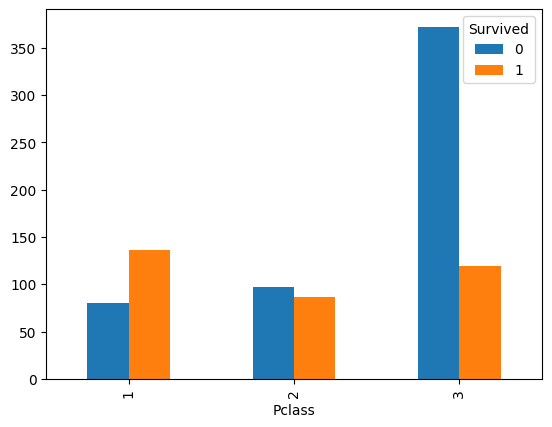

In [39]:
import matplotlib.pyplot as plt
pd.crosstab(df.Pclass,df.Survived).plot(kind='bar')

<Axes: xlabel='Sex'>

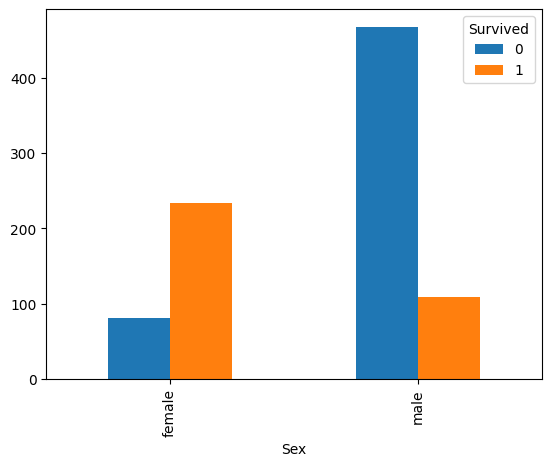

In [40]:
pd.crosstab(df.Sex,df.Survived).plot(kind='bar')